In [58]:
# Importar librerias
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('AirQualityUCI.csv', sep=";", header=None, names=["Date","Time","CO","PT08S1", "NMHC", "C6H6","PT08S2","NOx","PT08S3","NO2","PT08S4","PT08S5","T","RH","AH"])
df.drop(['Date'], axis = 1, inplace = True)
df.drop(['Time'], axis = 1, inplace = True)
df.drop([0],axis=0)
df.head()

,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [59]:
# Revisar nulos
print(df.info())

# Revisar atipicos
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      9357 non-null   float64
 1   PT08S1  9357 non-null   int64  
 2   NMHC    9357 non-null   int64  
 3   C6H6    9357 non-null   float64
 4   PT08S2  9357 non-null   int64  
 5   NOx     9357 non-null   int64  
 6   PT08S3  9357 non-null   int64  
 7   NO2     9357 non-null   int64  
 8   PT08S4  9357 non-null   int64  
 9   PT08S5  9357 non-null   int64  
 10  T       9357 non-null   float64
 11  RH      9357 non-null   float64
 12  AH      9357 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 950.4 KB
None
                CO       PT08S1         NMHC         C6H6       PT08S2  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683   894.595276   
std      77.657170   329.832710   139.789093    41.380206  

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Configuracion inicial
df_train, df_test = train_test_split(df, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

#Se normalizan los datos para que queden en igual escala
scaler = MinMaxScaler()

# Se aplica a todas las columnas menos a las dummies y a las si/no que discutimos arriba
num_vars = ["CO","PT08S1", "NMHC", "C6H6","PT08S2","NOx","PT08S3","NO2","PT08S4","PT08S5","T","RH","AH"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
7665,0.000000,0.489583,0.000000,0.765643,0.322287,0.000000,0.422130,0.000000,0.361681,0.296364,0.842407,0.897125,0.991684
7563,0.956111,0.550725,0.000000,0.788017,0.452361,0.307921,0.332293,0.631481,0.440000,0.420492,0.856324,0.865258,0.991840
4314,0.949976,0.517663,0.000000,0.778536,0.404722,0.000000,0.374610,0.000000,0.515294,0.305545,0.938191,0.791825,0.994617
9078,0.952808,0.657156,0.000000,0.795980,0.485915,0.306135,0.263267,0.637037,0.496471,0.617701,0.883749,0.855559,0.993139
4829,0.949976,0.496830,0.000000,0.784224,0.434548,0.212627,0.378425,0.537037,0.488403,0.407639,0.887024,0.854174,0.993316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.956583,0.688406,0.366822,0.802427,0.511599,0.228708,0.382241,0.577778,0.645714,0.437385,0.854278,0.951160,0.993136
79,0.957055,0.762681,0.257788,0.803565,0.515742,0.222752,0.374610,0.590741,0.613109,0.635329,0.878428,0.871147,0.993189
8039,0.952336,0.000000,0.000000,0.000000,0.000000,0.283502,0.000000,0.688889,0.000000,0.000000,0.000000,0.000000,0.000000
6936,0.975460,0.776268,0.000000,0.839970,0.637117,0.516974,0.233784,0.694444,0.604370,0.814543,0.860418,0.894700,0.992556


In [19]:
data = df_train[["CO","PT08S1"]]
data

,CO,PT08S1
7665,0.000000,0.489583
7563,0.956111,0.550725
4314,0.949976,0.517663
9078,0.952808,0.657156
4829,0.949976,0.496830
...,...,...
350,0.956583,0.688406
79,0.957055,0.762681
8039,0.952336,0.000000
6936,0.975460,0.776268


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#se empieza a comparar cada una de las columnas con la variable de salida(CO(GT))
mod = smf.quantreg("CO ~ PT08S1", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:             0.007249
Model:                       QuantReg   Bandwidth:                   0.0008963
Method:                 Least Squares   Sparsity:                     0.007598
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:07:27   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9251      0.000   4995.933      0.000       0.925       0.925
PT08S1         0.0467      0.000    147.479      0.000       0.046       0.047
==============================================================================
"""

In [22]:
data = df_train[["CO","NMHC"]]
data

,CO,NMHC
7665,0.000000,0.000000
7563,0.956111,0.000000
4314,0.949976,0.000000
9078,0.952808,0.000000
4829,0.949976,0.000000
...,...,...
350,0.956583,0.366822
79,0.957055,0.257788
8039,0.952336,0.000000
6936,0.975460,0.000000


In [23]:

mod = smf.quantreg("CO ~ NMHC", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:            0.0008930
Model:                       QuantReg   Bandwidth:                    0.001747
Method:                 Least Squares   Sparsity:                      0.01623
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:09:05   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9504      0.000   9100.178      0.000       0.950       0.951
NMHC           0.0156      0.001     16.646      0.000       0.014       0.017
==============================================================================
"""

In [24]:

data = df_train[["CO","C6H6"]]
data

,CO,C6H6
7665,0.000000,0.765643
7563,0.956111,0.788017
4314,0.949976,0.778536
9078,0.952808,0.795980
4829,0.949976,0.784224
...,...,...
350,0.956583,0.802427
79,0.957055,0.803565
8039,0.952336,0.000000
6936,0.975460,0.839970


In [25]:
mod = smf.quantreg("CO ~ C6H6", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:            2.684e-05
Model:                       QuantReg   Bandwidth:                    0.001821
Method:                 Least Squares   Sparsity:                      0.01694
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:10:38   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9490      0.001   1802.394      0.000       0.948       0.950
C6H6           0.0024      0.001      3.566      0.000       0.001       0.004
==============================================================================
"""

In [26]:
data = df_train[["CO","PT08S2"]]
data

,CO,PT08S2
7665,0.000000,0.322287
7563,0.956111,0.452361
4314,0.949976,0.404722
9078,0.952808,0.485915
4829,0.949976,0.434548
...,...,...
350,0.956583,0.511599
79,0.957055,0.515742
8039,0.952336,0.000000
6936,0.975460,0.637117


In [27]:
mod = smf.quantreg("CO ~ PT08S2", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:             0.009519
Model:                       QuantReg   Bandwidth:                   0.0007581
Method:                 Least Squares   Sparsity:                     0.006901
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:11:11   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9315      0.000   6475.733      0.000       0.931       0.932
PT08S2         0.0452      0.000    149.139      0.000       0.045       0.046
==============================================================================
"""

In [28]:
data = df_train[["CO","NOx"]]
data

,CO,NOx
7665,0.000000,0.000000
7563,0.956111,0.307921
4314,0.949976,0.000000
9078,0.952808,0.306135
4829,0.949976,0.212627
...,...,...
350,0.956583,0.228708
79,0.957055,0.222752
8039,0.952336,0.283502
6936,0.975460,0.516974


In [29]:
mod = smf.quantreg("CO ~ NOx", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:              0.01696
Model:                       QuantReg   Bandwidth:                    0.001349
Method:                 Least Squares   Sparsity:                      0.01006
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:12:12   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9388      0.000   8616.553      0.000       0.939       0.939
NOx            0.0523      0.000    128.438      0.000       0.052       0.053
==============================================================================
"""

In [30]:
data = df_train[["CO","PT08S3"]]
data

,CO,PT08S3
7665,0.000000,0.422130
7563,0.956111,0.332293
4314,0.949976,0.374610
9078,0.952808,0.263267
4829,0.949976,0.378425
...,...,...
350,0.956583,0.382241
79,0.957055,0.374610
8039,0.952336,0.000000
6936,0.975460,0.233784


In [31]:
mod = smf.quantreg("CO ~ PT08S3", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:             0.005585
Model:                       QuantReg   Bandwidth:                    0.001283
Method:                 Least Squares   Sparsity:                      0.01133
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:13:58   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9648      0.000   4234.663      0.000       0.964       0.965
PT08S3        -0.0370      0.001    -59.082      0.000      -0.038      -0.036
==============================================================================
"""

In [61]:

data = df_train[["CO","NO2"]]
data

,CO,NO2
7665,0.000000,0.000000
7563,0.956111,0.631481
4314,0.949976,0.000000
9078,0.952808,0.637037
4829,0.949976,0.537037
...,...,...
350,0.956583,0.577778
79,0.957055,0.590741
8039,0.952336,0.688889
6936,0.975460,0.694444


In [62]:
mod = smf.quantreg("CO ~ NO2", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:              0.03272
Model:                       QuantReg   Bandwidth:                    0.007013
Method:                 Least Squares   Sparsity:                      0.05482
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:37:35   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8147      0.001   1056.573      0.000       0.813       0.816
NO2            0.2379      0.001    164.138      0.000       0.235       0.241
==============================================================================
"""

In [34]:

data = df_train[["CO","PT08S4"]]
data

,CO,PT08S4
7665,0.000000,0.361681
7563,0.956111,0.440000
4314,0.949976,0.515294
9078,0.952808,0.496471
4829,0.949976,0.488403
...,...,...
350,0.956583,0.645714
79,0.957055,0.613109
8039,0.952336,0.000000
6936,0.975460,0.604370


In [35]:
mod = smf.quantreg("CO ~ PT08S4", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:             0.001576
Model:                       QuantReg   Bandwidth:                    0.001642
Method:                 Least Squares   Sparsity:                      0.01393
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:16:26   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9418      0.000   3058.461      0.000       0.941       0.942
PT08S4         0.0177      0.001     32.059      0.000       0.017       0.019
==============================================================================
"""

In [36]:

data = df_train[["CO","PT08S5"]]
data

,CO,PT08S5
7665,0.000000,0.296364
7563,0.956111,0.420492
4314,0.949976,0.305545
9078,0.952808,0.617701
4829,0.949976,0.407639
...,...,...
350,0.956583,0.437385
79,0.957055,0.635329
8039,0.952336,0.000000
6936,0.975460,0.814543


In [37]:
mod = smf.quantreg("CO ~ PT08S5", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:             0.008390
Model:                       QuantReg   Bandwidth:                    0.001074
Method:                 Least Squares   Sparsity:                      0.01011
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:17:07   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9387      0.000   5425.853      0.000       0.938       0.939
PT08S5         0.0312      0.000     83.402      0.000       0.031       0.032
==============================================================================
"""

In [38]:

data = df_train[["CO","T"]]
data

,CO,T
7665,0.000000,0.842407
7563,0.956111,0.856324
4314,0.949976,0.938191
9078,0.952808,0.883749
4829,0.949976,0.887024
...,...,...
350,0.956583,0.854278
79,0.957055,0.878428
8039,0.952336,0.000000
6936,0.975460,0.860418


In [40]:
mod = smf.quantreg("CO ~ T", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:            6.473e-05
Model:                       QuantReg   Bandwidth:                    0.001840
Method:                 Least Squares   Sparsity:                      0.01699
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:17:54   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9528      0.001   1813.480      0.000       0.952       0.954
T             -0.0022      0.001     -3.667      0.000      -0.003      -0.001
==============================================================================
"""

In [41]:
data = df_train[["CO","RH"]]
data

,CO,RH
7665,0.000000,0.897125
7563,0.956111,0.865258
4314,0.949976,0.791825
9078,0.952808,0.855559
4829,0.949976,0.854174
...,...,...
350,0.956583,0.951160
79,0.957055,0.871147
8039,0.952336,0.000000
6936,0.975460,0.894700


In [42]:
mod = smf.quantreg("CO ~ RH", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:            0.0001391
Model:                       QuantReg   Bandwidth:                    0.001829
Method:                 Least Squares   Sparsity:                      0.01657
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:18:26   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9538      0.000   1931.899      0.000       0.953       0.955
RH            -0.0035      0.001     -6.008      0.000      -0.005      -0.002
==============================================================================
"""

In [43]:
data = df_train[["CO","AH"]]
data

,CO,AH
7665,0.000000,0.991684
7563,0.956111,0.991840
4314,0.949976,0.994617
9078,0.952808,0.993139
4829,0.949976,0.993316
...,...,...
350,0.956583,0.993136
79,0.957055,0.993189
8039,0.952336,0.000000
6936,0.975460,0.992556


In [44]:
mod = smf.quantreg("CO ~ AH", data)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                     CO   Pseudo R-squared:            8.859e-05
Model:                       QuantReg   Bandwidth:                    0.001839
Method:                 Least Squares   Sparsity:                      0.01702
Date:                Sat, 03 Dec 2022   No. Observations:                 6549
Time:                        22:19:02   Df Residuals:                     6547
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9533      0.001   1774.418      0.000       0.952       0.954
AH            -0.0024      0.001     -4.320      0.000      -0.003      -0.001
==============================================================================
"""

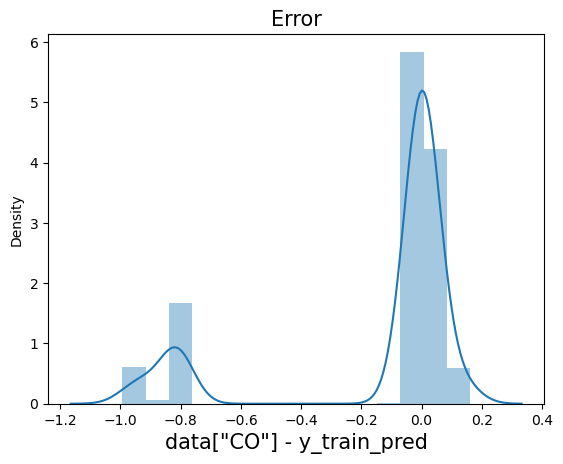

In [63]:
import seaborn as sns

y_train_pred = res.predict(data["NO2"])

# Calcular el residuo
r = (data["CO"] - y_train_pred)

# Mostrar el error
fig = plt.figure()
sns.distplot(r, bins = 15)
plt.title('Error', fontsize = 15)
plt.xlabel('data["CO"] - y_train_pred', fontsize = 15)
plt.show()

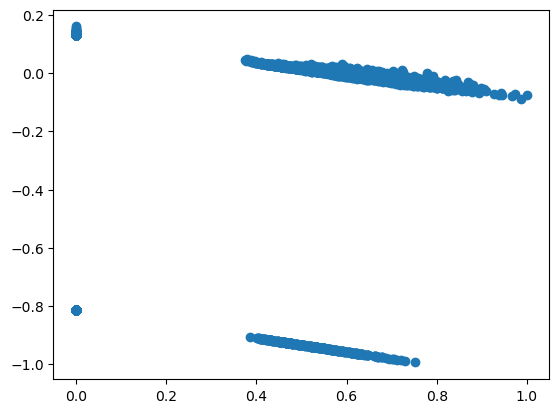

In [64]:
plt.scatter(data["NO2"],r)
plt.show()

In [65]:
num_vars = ["CO","PT08S1", "NMHC", "C6H6","PT08S2","NOx","PT08S3","NO2","PT08S4","PT08S5","T","RH","AH"]
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test

,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
343,0.948561,0.529891,0.196262,0.767918,0.340099,0.144133,0.554977,0.477778,0.487059,0.249357,0.863692,0.895047,0.992769
155,0.946201,0.484149,0.164330,0.764505,0.312345,0.135795,0.575789,0.444444,0.493445,0.318399,0.866967,0.893661,0.992937
5337,0.000000,0.502717,0.000000,0.778157,0.403065,0.000000,0.361429,0.000000,0.505210,0.385971,0.875972,0.958088,0.995002
2532,0.947145,0.495018,0.000000,0.772469,0.371168,0.147707,0.419008,0.470370,0.587563,0.367609,0.909128,0.887426,0.996286
3270,0.951864,0.617301,0.000000,0.788396,0.452775,0.172722,0.314256,0.524074,0.658824,0.432244,0.915677,0.932802,0.998879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8809,0.947617,0.623641,0.000000,0.786879,0.446562,0.291245,0.291710,0.651852,0.478655,0.383401,0.875972,0.858330,0.992717
8339,0.946201,0.501359,0.000000,0.762230,0.290804,0.148898,0.460978,0.461111,0.385546,0.219978,0.834630,0.975061,0.992258
1588,0.951392,0.589221,0.000000,0.795980,0.485501,0.175700,0.374263,0.550000,0.588908,0.441058,0.901351,0.811569,0.992932
2048,0.000000,0.476902,0.000000,0.775502,0.389395,0.000000,0.466875,0.000000,0.580168,0.336026,0.904625,0.866297,0.995069


In [66]:
data_test = df_test[["CO","NO2"]]
data_test

,CO,NO2
343,0.948561,0.477778
155,0.946201,0.444444
5337,0.000000,0.000000
2532,0.947145,0.470370
3270,0.951864,0.524074
...,...,...
8809,0.947617,0.651852
8339,0.946201,0.461111
1588,0.951392,0.550000
2048,0.000000,0.000000


In [67]:
#Separar x de y
y_test = data_test.pop('CO')
X_test = data_test

# Añadir variables
X_test_m4 = sm.add_constant(X_test)


# Hacer predicciones
y_pred_m4 = res.predict(X_test_m4)

In [68]:
from sklearn.metrics import r2_score
#Observar los valores de r2
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.031163254902840443

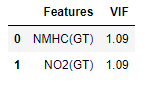

In [69]:
#Como la diferencia de los datos de chi-cuadrado del entrenamiento y el testeo fue menor a 0.5 se considera un buen modelo.
from IPython.display import Image

#Conclusiones

#En el modelo de regresion lineal se obtuvo un buen resultado ya que el r2 con los datos de entre entrenamiento fue de 0.440 y 
#el r2 de los datos de testeo fue de 0.48500388969482544, la cual no supera el 0.5 de diferencia y la variables usadas fueron \
#las siguientes:
Image(filename='Variables.PNG') 

In [ ]:
#Luego en la prueba de quantile regression se obtuvo igualmente un modelo bueno ya que el r2 de los datos de entrenamiento fue
#de 0.03272 y el r2 de los datos de testeo fue 0.031163254902840443, lo cual no supera el 0.5 de diferencia entre ellos y se 
#obtuvo este resultado con la variable NO2

#En conclusion podemos decir que ambas regresiones tuvieron buen comportamiento con el dataset Air Quality, ya que se consiguio
#un buen modelo en ambos casos y hubo una variable en común que fue NO2.